In [7]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib
pgf_with_rc_fonts = {
    "text.usetex": True,
    "text.latex.unicode": True,
    "font.family": "serif",
    "font.serif": [],                   # use latex default serif font
    "font.sans-serif": ["DejaVu Sans"], # use a specific sans-serif font
    "pgf.preamble": [
        r'\usepackage{amsmath}',
        r'\usepackage{gensymb}',
        r'\usepackage{siunitx}',
        r'\DeclareSIUnit{\revolution}{rev}',
    ]
}
matplotlib.rcParams.update(pgf_with_rc_fonts)

import matplotlib.pyplot as plt

import pandas as pd

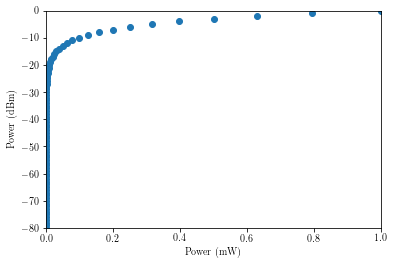

In [8]:
def dbm_to_mw(dbm):
    return 10**(dbm/10)

db_values = [i for i in range(-80, 1)]
mw_values = [dbm_to_mw(i) for i in db_values]
plt.plot(mw_values, db_values, 'o')
plt.xlabel("Power (mW)")
plt.ylabel("Power (dBm)")
plt.autoscale(tight=True)
plt.savefig('dbm.pgf')
plt.show()

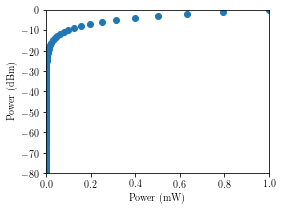

In [20]:
def dbm_to_mw(dbm):
    return 10**(dbm/10)

db_values = [i for i in range(-80, 1)]
mw_values = [dbm_to_mw(i) for i in db_values]
plt.rcParams["figure.figsize"] = [4, 3]
plt.plot(mw_values, db_values, 'o')
plt.xlabel("Power (mW)")
plt.ylabel("Power (dBm)")
plt.autoscale(tight=True)
plt.savefig('dbm_small.pgf')
plt.show()

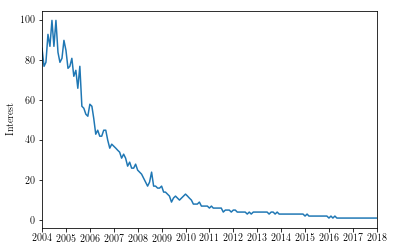

In [14]:
import datetime as dt
import matplotlib.dates as mdates

wardriving = pd.read_csv('multiTimeline.csv')
wardriving.Month = wardriving.Month.apply(lambda x: dt.datetime.strptime(x, '%Y-%m').date())
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator())
plt.ylabel("Interest")
ax.set_xlim([dt.datetime.strptime('2004-01-01', '%Y-%m-%d').date(),dt.datetime.strptime('2018-01-01', '%Y-%m-%d').date()])
ax.plot(wardriving.Month, wardriving['wardriving: (Worldwide)'])
plt.savefig('wardriving.pgf')

/home/bradford/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.
/home/bradford/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


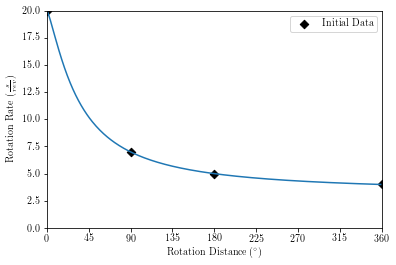

In [3]:
from scipy.optimize import curve_fit

def symmetric_sigmoid(x, a, b, c, d):
    return a + (b - a) / (1 + (x / c) ** d)

    #           0                 20
    #          90                  7
    #         180                  5
    #         360                  4

x = [0,90,180,360]
y = [20,7,5,4]

init_vals = [1, 0, 1]     # for [amp, cen, wid]

best_vals, _ = curve_fit(symmetric_sigmoid, x, y)

get_reset_rate = lambda x: symmetric_sigmoid(x, *tuple(best_vals))

RESET_RATE = [get_reset_rate(x) for x in range(360)]



fig = plt.figure()
ax = plt.subplot(111)

ticks = [x for x in range(0, 361, 45)]

ax.plot(range(360), RESET_RATE)
ax.scatter(x,y, marker='D', color='black', label='Initial Data')
plt.xlabel(r'Rotation Distance ($^\circ$)')
plt.ylabel(r'Rotation Rate ($\frac{s}{rev}$)')
plt.legend(fancybox=True, loc='best')
ax.set_xticks(ticks)
ax.set_xlim([0,360])
ax.set_ylim([0,20])
fig.savefig('sigmoid.pgf')


In [5]:
import math

x = arange()

math.sin(5)

-0.9589242746631385